# Weekly project part 1
    Using the image "appletree.jpg"
    A) Can you segment the apples from the tree?
    B) Can you get the computer to count how many there are? 
        How close can you get there are 26.
    C) Can you change color of one of them?
    D) Can you segment the leaves?
    
    
# Weekly project part 2
    A) Remove the greenscreen and replace the background in "itssp.png"?
    B) Can improve the edge with erroding/dialating?


In [65]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

In [66]:
#Functions for making tracbars for thresholding
def empty_function(*args):
    pass

def HSVTrackbar(img):
    """
    input:
    img - HSV image
    
    returns:
    target - original image masked
    mask - binary image of mask
    """
    win_name = "ThresholdTrackbar"
    img = img.copy()

    cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)
    cv2.resizeWindow(win_name, 1000,500)
    
    cv2.createTrackbar("lowH", win_name, 0, 255, empty_function)
    cv2.createTrackbar("lowS", win_name, 65, 255, empty_function)
    cv2.createTrackbar("lowV", win_name, 50, 255, empty_function)
    cv2.createTrackbar("highH", win_name, 10, 255, empty_function)
    cv2.createTrackbar("highS", win_name, 255, 255, empty_function)
    cv2.createTrackbar("highV", win_name, 255, 255, empty_function)
    
    while True:
        lowH = cv2.getTrackbarPos("lowH", win_name)
        lowS = cv2.getTrackbarPos("lowS", win_name)
        lowV = cv2.getTrackbarPos("lowV", win_name)
        highH = cv2.getTrackbarPos("highH", win_name)
        highS = cv2.getTrackbarPos("highS", win_name)
        highV = cv2.getTrackbarPos("highV", win_name)
        
        img_temp = img.copy()
        mask = cv2.inRange(img_temp, (lowH, lowS, lowV), (highH, highS, highV))
        target = cv2.bitwise_and(img_temp, img_temp, mask=mask)
        cv2.imshow(win_name, cv2.cvtColor(target, cv2.COLOR_HSV2BGR))
        
        # Code exits "while true loop" by pressing letter 'c'
        key = cv2.waitKey(1) & 0xFF
        if key == ord("c"):
            break

    cv2.destroyAllWindows()
    return target, mask

# Part I

width=1600, height=1200, depth=3


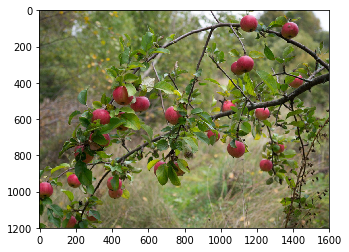

In [67]:
#Reading in the original
orig = cv2.imread("appletree.jpg")
(h, w, d) = orig.shape
print("width={}, height={}, depth={}".format(w, h, d))
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))

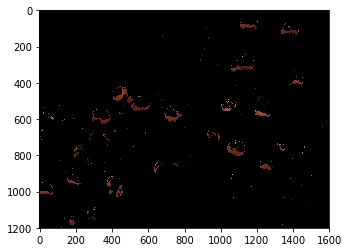

In [68]:
#Making a copy of the original and thresholding in HSV
temp = orig.copy()
th, mask = HSVTrackbar(cv2.cvtColor(temp, cv2.COLOR_BGR2HSV))
plt.imshow(cv2.cvtColor(th, cv2.COLOR_HSV2RGB))

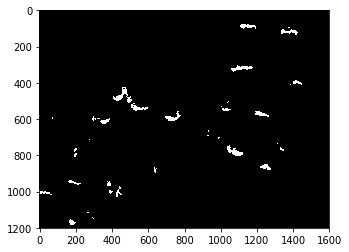

In [69]:
#Using closing/opening on the thresholded image
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray')

In [70]:
#Counting contours
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("I found {} objects!".format(len(cnts)))

I found 644 objects!


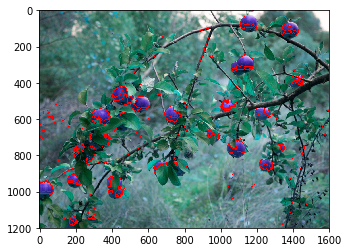

In [71]:
#Drawing contours
output = orig.copy()
cv2.drawContours(output, cnts, -1, (255, 0, 0), 3)    
plt.imshow(output)

# Part II

width=1280, height=720, depth=3


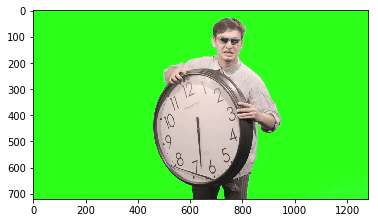

In [72]:
bgr_img = cv2.imread("ittsp.png")
(h, w, d) = bgr_img.shape
print("width={}, height={}, depth={}".format(w, h, d))
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))

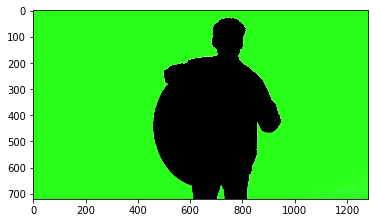

In [73]:
#Tresholding to keep the green
temp = bgr_img.copy()
th, mask = HSVTrackbar(cv2.cvtColor(temp, cv2.COLOR_BGR2HSV))
plt.imshow(cv2.cvtColor(th, cv2.COLOR_HSV2RGB))

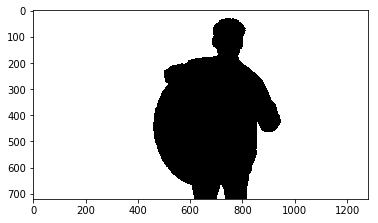

In [74]:
#Show mask
plt.imshow(mask, cmap = 'gray')

In [75]:
#Eroding the mask seemed to make it worse
#mask_copy = mask.copy()
#mask_copy = cv2.erode(mask_copy, None, iterations = 5)
#plt.imshow(mask_copy, cmap = 'gray')

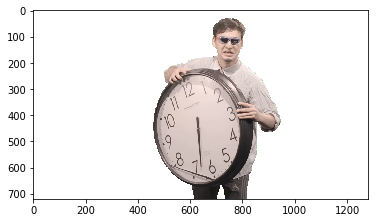

In [76]:
#Changing the background to white (not sure what to change it to from the exercise description)
temp[mask==255] = 255                                       
plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))

width=1600, height=1200, depth=3


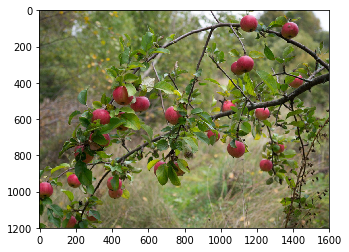

In [77]:
#Reading in another image to put as a background 
bgr_img2 = cv2.imread("appletree.jpg")
(h, w, d) = bgr_img2.shape
print("width={}, height={}, depth={}".format(w, h, d))
plt.imshow(cv2.cvtColor(bgr_img2, cv2.COLOR_BGR2RGB))

New width is: 960.0


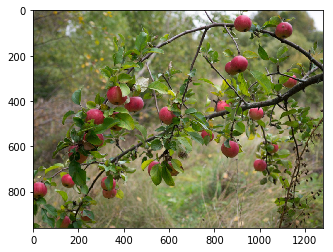

In [78]:
#Scaling the background image normally (using aspect ratio)
r = 1280 / w
dim = (1280, int(h * r))
resized = cv2.resize(bgr_img2, dim)
print("New width is:", h*r)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

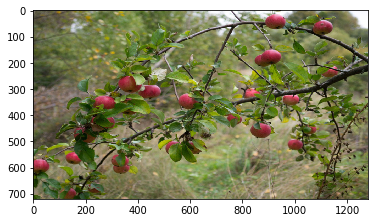

In [79]:
#Scaling a bit more (ignorig the ratio)
resized = cv2.resize(resized, (1280, 720))
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

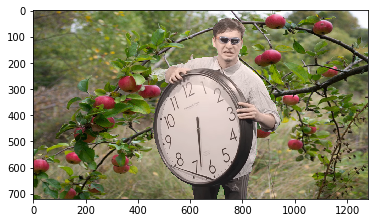

In [80]:
#Substituting the apple background instead of the green
temp[mask==255] = resized[mask==255]             
plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))

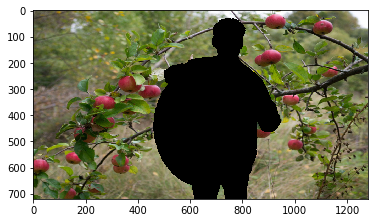

In [81]:
#Trying to do the same thing using bitwise and/or which makes more sense (and failing at it and giving up)
output = cv2.bitwise_and(resized, resized, mask=mask)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

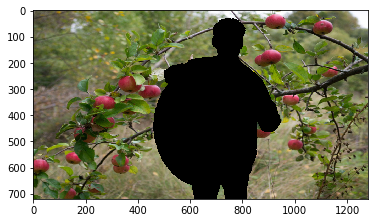

In [82]:
mask = cv2.bitwise_not(mask)
output2 = cv2.bitwise_and(output, bgr_img, mask=mask)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))